## <center> Statistical Anomalies in Premier League Matches

### <center> Summary

The goal with this project is to look at the theoritical premier leauge teams have 

In [2]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from bs4 import BeautifulSoup

### <center> Scraping data 

In [4]:
df_fbref_premier_stats = pd.read_html('https://fbref.com/en/comps/9/2019-2020/2019-2020-Premier-League-Stats', attrs={'id':'results2019-202091_overall'})[0]


In [5]:
df_fbref_premier_stats = df_fbref_premier_stats.dropna(subset='Rk')
df_fbref_premier_stats.columns = df_fbref_premier_stats.columns.str.strip().str.replace(' ', '_').str.replace('/', '_')

In [ ]:
df_fbref_premier_stats.to_csv('premier_data_stats.csv', index=False) 
'''
making the data into a csv file such that i can read it again and it becomes easier to 
work with
''' 
df_premier = pd.read_csv('premier_data_stats.csv')                   

    Rk            Squad  MP   W   D   L   GF  GA  GD  Pts  Pts_MP    xG   xGA  \
0    1        Liverpool  38  32   3   3   85  33  52   99    2.61  68.9  37.7   
1    2  Manchester City  38  26   3   9  102  35  67   81    2.13  92.0  36.2   
2    3   Manchester Utd  38  18  12   8   66  36  30   66    1.74  62.2  37.7   
3    4          Chelsea  38  20   6  12   69  54  15   66    1.74  69.2  38.6   
4    5   Leicester City  38  18   8  12   67  41  26   62    1.63  62.2  45.5   
5    6        Tottenham  38  16  11  11   61  47  14   59    1.55  47.9  54.2   
6    7           Wolves  38  15  14   9   51  40  11   59    1.55  54.1  38.0   
7    8          Arsenal  38  14  14  10   56  48   8   56    1.47  47.0  55.3   
8    9    Sheffield Utd  38  14  12  12   39  39   0   54    1.42  43.0  51.0   
9   10          Burnley  38  15   9  14   43  50  -7   54    1.42  47.4  49.8   
10  11      Southampton  38  15   7  16   51  60  -9   52    1.37  56.1  52.8   
11  12          Everton  38 

In [7]:
df_premier_sorted = df_premier.sort_values(by='xG', ascending=False)

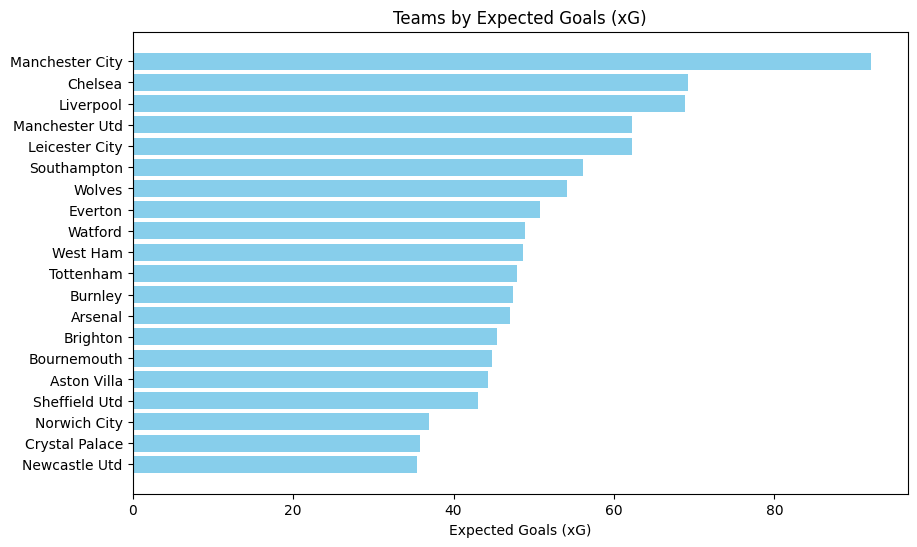

In [8]:
import matplotlib.pyplot as plt

# Select the top 10 teams for visualization (adjust if needed)
top_teams = df_premier_sorted[['Squad', 'xG']].head(20)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_teams['Squad'], top_teams['xG'], color='skyblue')
plt.xlabel('Expected Goals (xG)')
plt.title('Teams by Expected Goals (xG)')
plt.gca().invert_yaxis()  # Invert y-axis to have the team with the highest xG at the top
plt.show()

Getting the fixtures during the whole 2019-2020 season, this requires another method

In [9]:
url = 'https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures'

# Send a GET request to the website
response = requests.get(url)

# Parse the page content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table in the HTML (this is specific to the structure of the page)
table = soup.find('table', {'id': 'sched_2019-2020_9_1'})

# Use pandas to read the table directly from the HTML
df_premier_fixtures = pd.read_html(str(table))[0]

C:\Users\tonyf\AppData\Local\Temp\ipykernel_26216\583983586.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_premier_fixtures = pd.read_html(str(table))[0]


In [10]:
df_premier_fixtures.to_csv('premier_fixtures.csv', index=False)
df_fixtures = pd.read_csv('premier_fixtures.csv')

# Rename columns for easier access
df_fixtures.columns = ['Week', 'Day', 'Date', 'Time', 'Home', 'xG_Home', 'Score', 'xG_Away', 'Away', 'Attendance', 'Venue', 'Referee', 'Match_Report', 'Notes']

# Convert 'Date' to datetime format
df_fixtures['Date'] = pd.to_datetime(df_fixtures['Date'])

# Split the 'Score' column into 'Home_Score' and 'Away_Score'
df_fixtures[['Home_Score', 'Away_Score']] = df_fixtures['Score'].str.split('–', expand=True)

# Convert 'Home_Score' and 'Away_Score' to numeric values
df_fixtures['Home_Score'] = pd.to_numeric(df_fixtures['Home_Score'], errors='coerce')
df_fixtures['Away_Score'] = pd.to_numeric(df_fixtures['Away_Score'], errors='coerce')

# Handle missing values by filling with 'No Data' or another placeholder as needed
df_fixtures.fillna('No Data', inplace = True)

# Display the cleaned data
print(df_fixtures.head(10))

  Week  Day                 Date   Time            Home xG_Home Score xG_Away  \
0  1.0  Fri  2019-08-09 00:00:00  20:00       Liverpool     1.8   4–1     0.9   
1  1.0  Sat  2019-08-10 00:00:00  12:30        West Ham     1.1   0–5     3.2   
2  1.0  Sat  2019-08-10 00:00:00  15:00         Burnley     0.9   3–0     1.2   
3  1.0  Sat  2019-08-10 00:00:00  15:00         Watford     0.7   0–3     0.8   
4  1.0  Sat  2019-08-10 00:00:00  15:00  Crystal Palace     0.9   0–0     1.1   
5  1.0  Sat  2019-08-10 00:00:00  15:00     Bournemouth     1.3   1–1     1.3   
6  1.0  Sat  2019-08-10 00:00:00  17:30       Tottenham     2.4   3–1     0.7   
7  1.0  Sun  2019-08-11 00:00:00  14:00   Newcastle Utd     0.4   0–1     1.1   
8  1.0  Sun  2019-08-11 00:00:00  14:00  Leicester City     0.7   0–0     0.7   
9  1.0  Sun  2019-08-11 00:00:00  16:30  Manchester Utd     2.2   4–0     1.0   

              Away Attendance                      Venue          Referee  \
0     Norwich City    53333.0  

C:\Users\tonyf\AppData\Local\Temp\ipykernel_26216\4219939914.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Data' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fixtures.fillna('No Data', inplace = True)
C:\Users\tonyf\AppData\Local\Temp\ipykernel_26216\4219939914.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Data' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_fixtures.fillna('No Data', inplace = True)


In [26]:
Chelsea_home = df_fixtures[df_fixtures['Home'] == 'Chelsea']
Chelsea_away = df_fixtures[df_fixtures['Away'] == 'Chelsea']

# Combine both home and away matches into a single DataFrame
Chelsea_matches = pd.concat([Chelsea_home, Chelsea_away])

# Display the filtered data
print(Chelsea_matches[['Date', 'Home', 'Away', 'Score', 'xG_Home', 'xG_Away']])

                    Date             Home             Away Score xG_Home  \
19   2019-08-18 00:00:00          Chelsea   Leicester City   1–1     1.1   
37   2019-08-31 00:00:00          Chelsea    Sheffield Utd   2–2     2.0   
63   2019-09-22 00:00:00          Chelsea        Liverpool   1–2     1.3   
67   2019-09-28 00:00:00          Chelsea         Brighton   2–0     3.7   
93   2019-10-19 00:00:00          Chelsea    Newcastle Utd   1–0     2.0   
122  2019-11-09 00:00:00          Chelsea   Crystal Palace   2–0     3.6   
147  2019-11-30 00:00:00          Chelsea         West Ham   0–1     2.3   
158  2019-12-04 00:00:00          Chelsea      Aston Villa   2–1     1.8   
180  2019-12-14 00:00:00          Chelsea      Bournemouth   0–1     2.1   
203  2019-12-26 00:00:00          Chelsea      Southampton   0–2     0.7   
232  2020-01-11 00:00:00          Chelsea          Burnley   3–0     2.7   
257  2020-01-21 00:00:00          Chelsea          Arsenal   2–2     2.9   
284  2020-02

In [27]:
def calculate_actual_points(row):
    if row['Home'] == 'Chelsea':
        if row['Home_Score'] > row['Away_Score']:
            return 3  # Win
        elif row['Home_Score'] == row['Away_Score']:
            return 1  # Draw
        else:
            return 0  # Loss
    elif row['Away'] == 'Chelsea':
        if row['Away_Score'] > row['Home_Score']:
            return 3  # Win
        elif row['Away_Score'] == row['Home_Score']:
            return 1  # Draw
        else:
            return 0  # Loss

def calculate_theoretical_points(row):
    if row['xG_Home'] > row['xG_Away']:
        return 3  # Win based on higher xG
    elif row['xG_Home'] == row['xG_Away']:
        return 1  # Draw based on equal xG
    else:
        return 0  # Loss based on lower xG
    
Chelsea_matches['Actual_Points'] = Chelsea_matches.apply(calculate_actual_points, axis=1)
Chelsea_matches['Theoretical_Points'] = Chelsea_matches.apply(calculate_theoretical_points, axis=1)

# Display the data with actual and theoretical points
print(Chelsea_matches[['Date', 'Actual_Points', 'Theoretical_Points']])

                    Date  Actual_Points  Theoretical_Points
19   2019-08-18 00:00:00              1                   3
37   2019-08-31 00:00:00              1                   3
63   2019-09-22 00:00:00              0                   3
67   2019-09-28 00:00:00              3                   3
93   2019-10-19 00:00:00              3                   3
122  2019-11-09 00:00:00              3                   3
147  2019-11-30 00:00:00              0                   3
158  2019-12-04 00:00:00              3                   3
180  2019-12-14 00:00:00              0                   3
203  2019-12-26 00:00:00              0                   0
232  2020-01-11 00:00:00              3                   3
257  2020-01-21 00:00:00              1                   3
284  2020-02-17 00:00:00              0                   3
287  2020-02-22 00:00:00              3                   3
314  2020-03-08 00:00:00              3                   3
341  2020-06-25 00:00:00              3 

In [28]:
Chelsea_matches['Cumulative_Actual_Points'] = Chelsea_matches['Actual_Points'].cumsum()
Chelsea_matches['Cumulative_Theoretical_Points'] = Chelsea_matches['Theoretical_Points'].cumsum()

# Display the cumulative points
print(Chelsea_matches[['Date', 'Cumulative_Actual_Points', 'Cumulative_Theoretical_Points']])

                    Date  Cumulative_Actual_Points  \
19   2019-08-18 00:00:00                         1   
37   2019-08-31 00:00:00                         2   
63   2019-09-22 00:00:00                         2   
67   2019-09-28 00:00:00                         5   
93   2019-10-19 00:00:00                         8   
122  2019-11-09 00:00:00                        11   
147  2019-11-30 00:00:00                        11   
158  2019-12-04 00:00:00                        14   
180  2019-12-14 00:00:00                        14   
203  2019-12-26 00:00:00                        14   
232  2020-01-11 00:00:00                        17   
257  2020-01-21 00:00:00                        18   
284  2020-02-17 00:00:00                        18   
287  2020-02-22 00:00:00                        21   
314  2020-03-08 00:00:00                        24   
341  2020-06-25 00:00:00                        27   
358  2020-07-04 00:00:00                        30   
387  2020-07-14 00:00:00    

          Date             Home             Away Score xG_Home xG_Away
9   2019-08-11   Manchester Utd          Chelsea   4–0     2.2     1.0
19  2019-08-18          Chelsea   Leicester City   1–1     1.1     0.8
23  2019-08-24     Norwich City          Chelsea   2–3     1.1     1.5
37  2019-08-31          Chelsea    Sheffield Utd   2–2     2.0     1.1
45  2019-09-14           Wolves          Chelsea   2–5     1.7     2.7
63  2019-09-22          Chelsea        Liverpool   1–2     1.3     0.6
67  2019-09-28          Chelsea         Brighton   2–0     3.7     0.6
84  2019-10-06      Southampton          Chelsea   1–4     1.4     1.7
93  2019-10-19          Chelsea    Newcastle Utd   1–0     2.0     0.4
104 2019-10-26          Burnley          Chelsea   2–4     2.1     0.9
117 2019-11-02          Watford          Chelsea   1–2     1.3     2.1
122 2019-11-09          Chelsea   Crystal Palace   2–0     3.6     0.2
139 2019-11-23  Manchester City          Chelsea   2–1     1.0     0.9
147 20

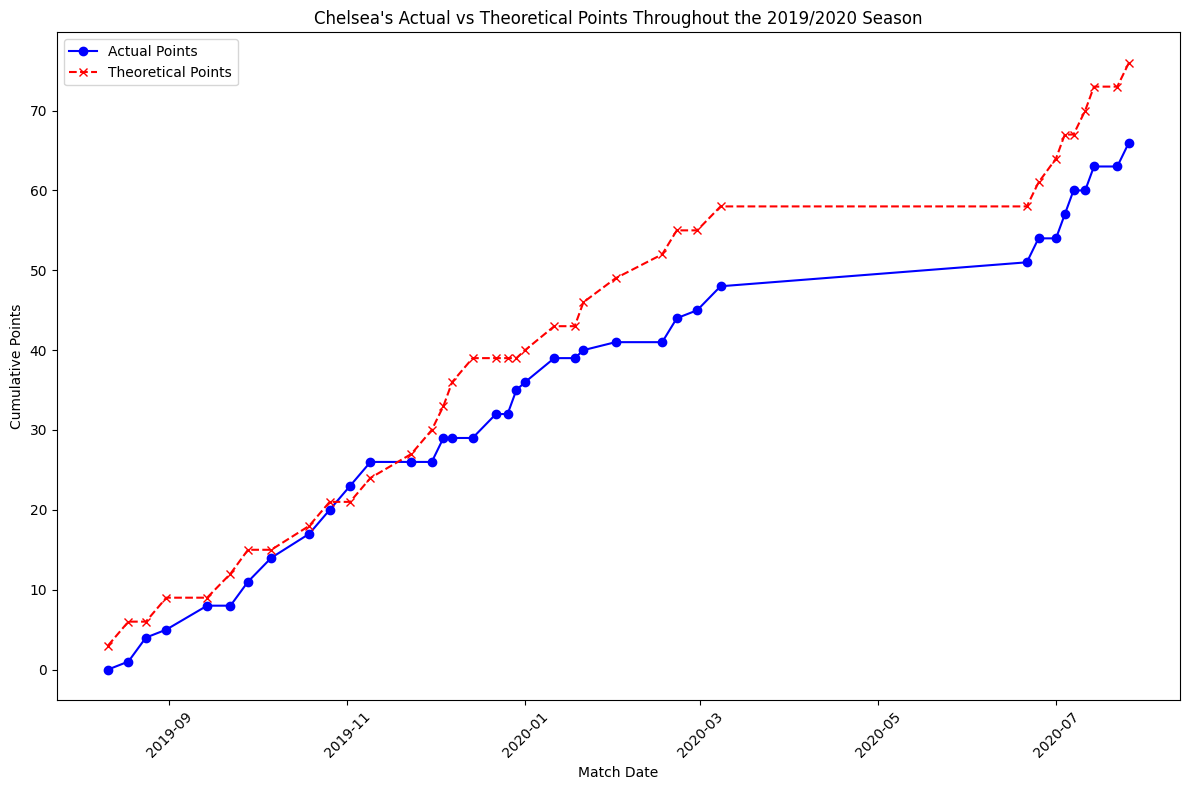

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_fixtures is already loaded
Chelsea_home = df_fixtures[df_fixtures['Home'] == 'Chelsea']
Chelsea_away = df_fixtures[df_fixtures['Away'] == 'Chelsea']

# Combine both home and away matches into a single DataFrame
Chelsea_matches = pd.concat([Chelsea_home, Chelsea_away])

# Ensure the 'Date' column is in datetime format for sorting
Chelsea_matches['Date'] = pd.to_datetime(Chelsea_matches['Date'])

# Sort matches by date from the latest to the most recent
Chelsea_matches = Chelsea_matches.sort_values('Date', ascending=True)

# Display the filtered data
print(Chelsea_matches[['Date', 'Home', 'Away', 'Score', 'xG_Home', 'xG_Away']])

# Define the function to calculate actual points
def calculate_actual_points(row):
    if row['Home'] == 'Chelsea':
        if row['Home_Score'] > row['Away_Score']:
            return 3  # Win
        elif row['Home_Score'] == row['Away_Score']:
            return 1  # Draw
        else:
            return 0  # Loss
    elif row['Away'] == 'Chelsea':
        if row['Away_Score'] > row['Home_Score']:
            return 3  # Win
        elif row['Away_Score'] == row['Home_Score']:
            return 1  # Draw
        else:
            return 0  # Loss

# Define the function to calculate theoretical points
def calculate_theoretical_points(row):
    if row['xG_Home'] > row['xG_Away']:
        return 3  # Win based on higher xG
    elif row['xG_Home'] == row['xG_Away']:
        return 1  # Draw based on equal xG
    else:
        return 0  # Loss based on lower xG

# Apply the functions to calculate actual and theoretical points
Chelsea_matches['Actual_Points'] = Chelsea_matches.apply(calculate_actual_points, axis=1)
Chelsea_matches['Theoretical_Points'] = Chelsea_matches.apply(calculate_theoretical_points, axis=1)

# Display the data with actual and theoretical points
print(Chelsea_matches[['Date', 'Actual_Points', 'Theoretical_Points']])

# Calculate cumulative points for actual and theoretical results
Chelsea_matches['Cumulative_Actual_Points'] = Chelsea_matches['Actual_Points'].cumsum()
Chelsea_matches['Cumulative_Theoretical_Points'] = Chelsea_matches['Theoretical_Points'].cumsum()

# Display the cumulative points
print(Chelsea_matches[['Date', 'Cumulative_Actual_Points', 'Cumulative_Theoretical_Points']])

# Plotting the cumulative actual and theoretical points over time
plt.figure(figsize=(12, 8))
plt.plot(
    Chelsea_matches['Date'], Chelsea_matches['Cumulative_Actual_Points'],
    label='Actual Points', color='b', marker='o'
)
plt.plot(
    Chelsea_matches['Date'], Chelsea_matches['Cumulative_Theoretical_Points'],
    label='Theoretical Points', color='r', linestyle='--', marker='x'
)

plt.xlabel('Match Date')
plt.ylabel('Cumulative Points')
plt.title("Chelsea's Actual vs Theoretical Points Throughout the 2019/2020 Season")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Reason for the big hold up in the graph is because it was the period when all the corona restricitions and there no matches were played

In [32]:
def calculate_actual_result(row):
    if row['Home_Score'] > row['Away_Score']:
        return 'Home Win'
    elif row['Home_Score'] < row['Away_Score']:
        return 'Away Win'
    else:
        return 'Draw'

# Calculate theoretical result based on xG
def calculate_theoretical_result(row):
    if row['xG_Home'] > row['xG_Away']:
        return 'Home Win'
    elif row['xG_Home'] < row['xG_Away']:
        return 'Away Win'
    else:
        return 'Draw'

# Add columns for results
Chelsea_matches['Actual_Result'] = Chelsea_matches.apply(calculate_actual_result, axis=1)
Chelsea_matches['Theoretical_Result'] = Chelsea_matches.apply(calculate_theoretical_result, axis=1)

# Identify mismatches
Chelsea_matches['Unexpected_Outcome'] = Chelsea_matches['Actual_Result'] != Chelsea_matches['Theoretical_Result']

# Filter games with unexpected outcomes
unexpected_games = Chelsea_matches[Chelsea_matches['Unexpected_Outcome']]

# Display games where stats don't correlate with outcomes
print(unexpected_games[['Date', 'Home', 'Away', 'Score', 'xG_Home', 'xG_Away', 'Actual_Result', 'Theoretical_Result']])

          Date            Home            Away Score xG_Home xG_Away  \
19  2019-08-18         Chelsea  Leicester City   1–1     1.1     0.8   
37  2019-08-31         Chelsea   Sheffield Utd   2–2     2.0     1.1   
63  2019-09-22         Chelsea       Liverpool   1–2     1.3     0.6   
104 2019-10-26         Burnley         Chelsea   2–4     2.1     0.9   
147 2019-11-30         Chelsea        West Ham   0–1     2.3     0.9   
180 2019-12-14         Chelsea     Bournemouth   0–1     2.1     1.0   
248 2020-01-18   Newcastle Utd         Chelsea   1–0     0.6     2.4   
257 2020-01-21         Chelsea         Arsenal   2–2     2.9     0.4   
265 2020-02-01  Leicester City         Chelsea   2–2     1.4     0.6   
284 2020-02-17         Chelsea  Manchester Utd   0–2     0.9     0.6   
301 2020-02-29     Bournemouth         Chelsea   2–2     1.4     1.9   
407 2020-07-22       Liverpool         Chelsea   5–3     1.7     2.4   

    Actual_Result Theoretical_Result  
19           Draw       

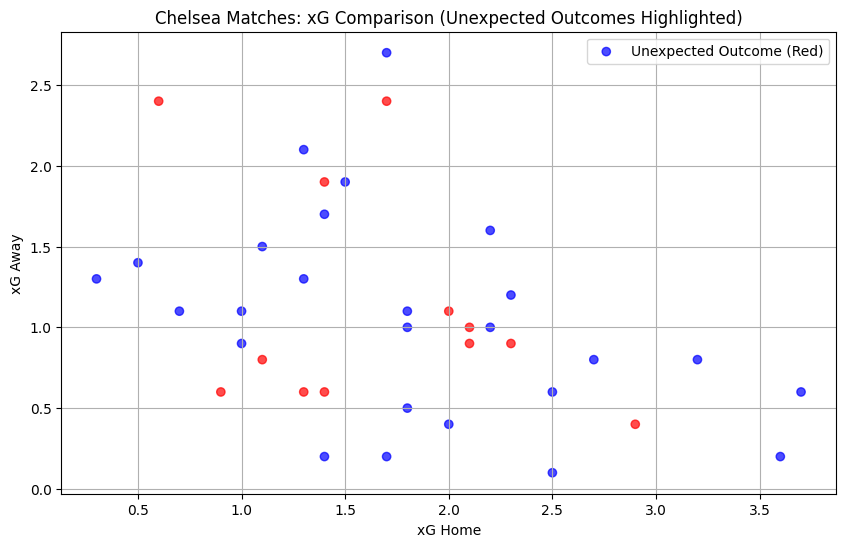

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(
    Chelsea_matches['xG_Home'], Chelsea_matches['xG_Away'],
    c=Chelsea_matches['Unexpected_Outcome'].map({True: 'red', False: 'blue'}),
    alpha=0.7, label='Unexpected Outcome (Red)'
)

plt.xlabel('xG Home')
plt.ylabel('xG Away')
plt.title('Chelsea Matches: xG Comparison (Unexpected Outcomes Highlighted)')
plt.legend()
plt.grid()
plt.show()

As we can see all the blue dots tell us that they won all the matches were the odds were with them and the expetced outcome was as predicted but, then we have a few outliers which are red and they indicate that there been more upsets then expected given that chelsea as a football club have a relativly high xG compared to the rest of the premier leauge.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np

In [34]:
df_premier = pd.read_csv('premier_data_stats.csv')
df_fixtures = pd.read_csv('premier_fixtures.csv')

# Review column names
print("Premier Data Columns:", df_premier.columns)
print("Fixtures Data Columns:", df_fixtures.columns)

# Rename columns in fixtures for clarity
df_fixtures.rename(columns={'xG': 'Home_xG', 'xG.1': 'Away_xG'}, inplace=True)

# Extract Home and Away scores from the Score column in df_fixtures
if 'Score' in df_fixtures.columns:
    df_fixtures[['Home_Score', 'Away_Score']] = df_fixtures['Score'].str.split('–', expand=True).astype(float)

# Merge fixture and team stats data to enable calculations
df_fixtures['Home_Team'] = df_fixtures['Home'].str.strip()
df_fixtures['Away_Team'] = df_fixtures['Away'].str.strip()

df_fixtures = df_fixtures.merge(df_premier[['Squad', 'xG', 'xGA', 'GD', 'Pts']],
                                left_on='Home_Team', right_on='Squad', how='left') \
                         .rename(columns={'xG': 'Home_Team_xG', 'xGA': 'Home_Team_xGA', 'GD': 'Home_Team_GD', 'Pts': 'Home_Team_Pts'}) \
                         .drop(columns=['Squad'], errors='ignore')

df_fixtures = df_fixtures.merge(df_premier[['Squad', 'xG', 'xGA', 'GD', 'Pts']],
                                left_on='Away_Team', right_on='Squad', how='left') \
                         .rename(columns={'xG': 'Away_Team_xG', 'xGA': 'Away_Team_xGA', 'GD': 'Away_Team_GD', 'Pts': 'Away_Team_Pts'}) \
                         .drop(columns=['Squad'], errors='ignore')

# Calculate metrics:
# 1. Compare xG difference between Home and Away teams
# 2. Highlight games where underdogs overperform (win despite lower xG)

df_fixtures['xG_Diff'] = df_fixtures['Home_xG'] - df_fixtures['Away_xG']
df_fixtures['Underdog_Overperformance'] = (
    ((df_fixtures['xG_Diff'] < 0) & (df_fixtures['Home_Score'] > df_fixtures['Away_Score'])) |
    ((df_fixtures['xG_Diff'] > 0) & (df_fixtures['Away_Score'] > df_fixtures['Home_Score']))
)

# Additional metrics for insights
df_fixtures['Home_Advantage_xG'] = df_fixtures['Home_Team_xG'] - df_fixtures['Away_Team_xG']
df_fixtures['Away_Advantage_xG'] = df_fixtures['Away_Team_xG'] - df_fixtures['Home_Team_xG']

# Save the enriched fixtures data
df_fixtures.to_csv('enriched_premier_fixtures.csv', index=False)

# Display the head of the updated DataFrame
print(df_fixtures.head(5))

Premier Data Columns: Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts_MP',
       'xG', 'xGA', 'xGD', 'xGD_90', 'Attendance', 'Top_Team_Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')
Fixtures Data Columns: Index(['Wk', 'Day', 'Date', 'Time', 'Home', 'xG', 'Score', 'xG.1', 'Away',
       'Attendance', 'Venue', 'Referee', 'Match Report', 'Notes'],
      dtype='object')
    Wk  Day        Date   Time            Home  Home_xG Score  Away_xG  \
0  1.0  Fri  2019-08-09  20:00       Liverpool      1.8   4–1      0.9   
1  1.0  Sat  2019-08-10  12:30        West Ham      1.1   0–5      3.2   
2  1.0  Sat  2019-08-10  15:00         Burnley      0.9   3–0      1.2   
3  1.0  Sat  2019-08-10  15:00         Watford      0.7   0–3      0.8   
4  1.0  Sat  2019-08-10  15:00  Crystal Palace      0.9   0–0      1.1   

              Away  Attendance  ... Home_Team_GD Home_Team_Pts Away_Team_xG  \
0     Norwich City     53333.0  ...         52.0          99.0    

C:\Users\tonyf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


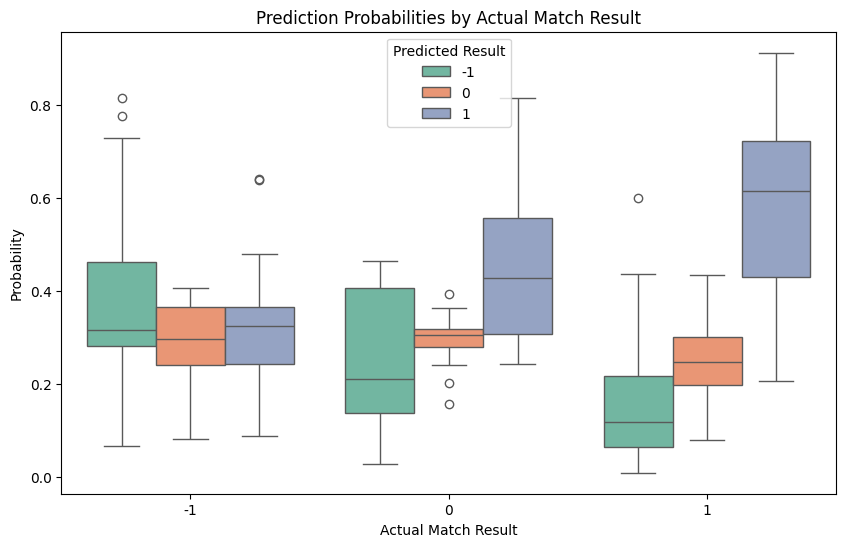

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the match_result function
def match_result(row):
    if row['Home_Score'] > row['Away_Score']:
        return 1  # Home Win
    elif row['Home_Score'] < row['Away_Score']:
        return -1  # Away Win
    else:
        return 0  # Draw

# Add the Match_Result column
df_fixtures['Match_Result'] = df_fixtures.apply(match_result, axis=1)

# Drop rows with missing Match_Result values or required features
features = ['Home_xG', 'Away_xG', 'Attendance']  # Update feature names as per your data
df_clean = df_fixtures.dropna(subset=['Match_Result'] + features)

# Define features (X) and target (y)
X = df_clean[features]
y = df_clean['Match_Result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict probabilities
y_proba = log_reg.predict_proba(X_test)

# Create a DataFrame for plotting
prob_df = pd.DataFrame(y_proba, columns=log_reg.classes_)
prob_df['Match Result'] = y_test.values

# Melt the DataFrame for easier plotting
melted_df = prob_df.melt(id_vars='Match Result', var_name='Predicted Result', value_name='Probability')

# Plot probabilities
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='Match Result', y='Probability', hue='Predicted Result', palette='Set2')
plt.title("Prediction Probabilities by Actual Match Result")
plt.ylabel("Probability")
plt.xlabel("Actual Match Result")
plt.legend(title="Predicted Result")
plt.show()

The outliers within every box plot indicates the uppsets for fixtures during the 2019/2020 season 

Classification Report:
              precision    recall  f1-score   support

          -1       0.50      0.42      0.46        19
           0       0.00      0.00      0.00        13
           1       0.60      0.81      0.69        26

    accuracy                           0.50        58
   macro avg       0.37      0.41      0.38        58
weighted avg       0.43      0.50      0.46        58

Confusion Matrix:
[[ 8  5  6]
 [ 5  0  8]
 [ 3  2 21]]

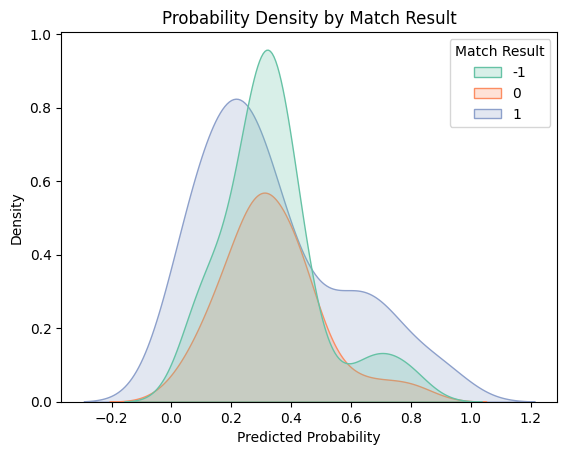

In [33]:
sns.kdeplot(data=melted_df, x='Probability', hue='Match Result', palette='Set2', fill=True)
plt.title("Probability Density by Match Result")
plt.xlabel("Predicted Probability")
plt.show()

### <center> Hypothesis

Teams with a significant difference between their expected goals (xG) at home and away will show a discrepancy in actual results (points earned) when compared to their expected points. This suggests that either home advantage or away struggles are influencing performance more than expected, potentially due to factors like fan support, travel fatigue, or referee bias.

The goal with this project is to look at how teams perform in the premier leauge based on thier xG. To give context on what xG is in football, it's a probailty figure on what a team is expected to score during a season given the players they have and thier statistics. In this rapport we are going to follow a team to give clarification on how the figure xG isn't always the figure to look at out for when trying to predict how it's going to end for a team in the premier leauge. There are alot of facotrs and paramters to take into considertion when calculatiing the xG and this figure is what teams look out for when purschasing new players to thier squad. They look out for the xG for an specific player when determining if to purschase the player or not. Intuitly the players with a high xG comes with a greater price tag. Premier leauge is the highest spending leauge in football with a figure currently sitting at 11.83£bn. One of the highest spending clubs in the premier leauge is Chelsea Football Club with a club valuation at 2.3£ billion pounds and £1.2 billion pounds were spent on just players last season. But does this spending spree neccerly reflect the result the club are looking for. From a statical point of view chelsea should've been in contenion for the title fight given that there xG is one of the highest in the premier leauge. 

When analyzing Chelsea we can see that with thier xG that they underperformed when scoring goals and that also reflected at thier position in the premier leauge. But xG isn't the only parameter that we have to take into consideration when trying to predict thier end position in the premier leauge. Traditionally teams have some diffucaltiyt to win a certain venues in England. Chelsea haven't beaten Manchester United at thier homeground for many years dispite Manchester beeing the underdogs going into the fixture and the same goes for Liverpool. 

But this parameter does not have such a significant effect on the total outcome on where the teams should end up in the table. According to the probility for Chelsea to be in contiaon for the title they have massivly underperformed. 

An interesting thing to observe is that the varians is massive for the prediction of where teams in the premier leauge will end up. 

In insight money isn't the formula to winning the premier leauge but time has proven that it is a massive advantge if clubs want to win the premier leauge. 

The methods i will apply to this project is mainly webscarping from a website to collect data. This is effective and relible method to get hands on data. The main challange is to identify the tables that i want to collect the data from because some tables don't neceerly have a title that you can use to scrape the data from. This required me to use the inspect the website and scrolling thru the code for the interface and looking for the id. This id is what makes it possible too scrape the data from the desired table. 

We can also see that given thye dataframe we are working with help of linear regression, we have something that's normal distrubuted.

